In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math

In [8]:
import pandas as pd
from tabulate import tabulate

# Read the first CSV file and drop specified columns
df = pd.read_csv(r"Excels\gini_serial_no_district_excel1_csv.csv")
drop_columns = 'arsenic,carbonate,chloride,fluorine,iron,hydrogencarbonate,potassium,magnesium,nitrate,sodium,percentageofsodium,phosphateion,residualsodiumcarbonate,sodiumabsorptionratio,sulfate,silicondioxide,alkalinitytotal,potentialofhydrogen,electricalconductivity,hardnesstotal,totaldissolvedsolids'.split(',')
df = df.drop(columns=drop_columns)
df['SDP'] = None
gwq='calcium'

# Display the modified DataFrame
table = tabulate(df, headers='keys', tablefmt='pretty')

# Read the second CSV file
df2 = pd.read_csv(r"Excels\standardised1999-2022.csv")

# Rename states for consistency
df2 = df2.rename(columns={
    'JAMMU & KASHMIR': 'JAMMU AND KASHMIR',
    'ORISSA': 'ODISHA',
    'TAMIL NADU': 'TAMILNADU',
    'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN AND NICOBAR ISLANDS',
    'PUDUCHERRY': 'PONDICHERRY'
})

# Create a tabular representation of the DataFrame
table = tabulate(df2, headers='keys', tablefmt='pretty')

# Extract values for SIKKIM in exact years
exact_years = df2['SIKKIM']

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if (math.isnan(row['year'])): 
        print("Nan found continue")
        continue
    year = row['year']
    state = row['state'].upper()
    # print(year,state)

    # Handle state name inconsistencies
    if state == 'TAMIL NADU':
        state = 'TAMILNADU'
    if state == 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU':
        continue

    # Extract SDP value for the specific year and state
    value = df2.loc[(df2['exact_year'] == year) & (df2[state].notnull()), state].values
    
    # Skip if no value found for the specific year and state
    if len(value) == 0:
        continue

    # Assign SDP value to the corresponding row in the DataFrame
    df.at[index, 'SDP'] = float(value[0])
df = df.drop(['Unnamed: 30', 'Unnamed: 29'], axis=1)



In [9]:
df3 = pd.read_csv(r"Excels\GINI Index.xlsx - Sheet1.csv")
df3 = df3.loc[:, ['Serial No.', 'Gini, 2010 - 2011']]
table3 = tabulate(df3, headers='keys', tablefmt='pretty')
print(table3)

+-----+------------+-------------------+
|     | Serial No. | Gini, 2010 - 2011 |
+-----+------------+-------------------+
|  0  |    nan     |       0.35        |
|  1  |    1.0     |       0.33        |
|  2  |    2.0     |       0.33        |
|  3  |    3.0     |        0.3        |
|  4  |    nan     |       0.33        |
|  5  |    4.0     |       0.26        |
|  6  |    5.0     |       0.24        |
|  7  |    6.0     |       0.33        |
|  8  |    7.0     |       0.27        |
|  9  |    8.0     |       0.27        |
| 10  |    9.0     |       0.28        |
| 11  |    10.0    |       0.35        |
| 12  |    11.0    |       0.33        |
| 13  |    12.0    |       0.31        |
| 14  |    13.0    |       0.42        |
| 15  |    14.0    |       0.27        |
| 16  |    15.0    |       0.28        |
| 17  |    16.0    |       0.26        |
| 18  |    nan     |       0.32        |
| 19  |    17.0    |       0.23        |
| 20  |    18.0    |        0.3        |
| 21  |    19.0 

In [10]:
df['Gini'] = None

for index, row in df.iterrows():
    s_no=row['Serial No.']
    if (math.isnan(s_no)): 
        print("Nan found continue")
        continue
    # print(s_no)

    value = df3.loc[(df3['Serial No.'] == s_no)].values
    df.at[index, 'Gini'] = float(value[0][1])

Nan found continue


In [11]:
table = tabulate(df, headers='keys', tablefmt='pretty')
print(table)

+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|       | country |                    state                     |          district           | year |              dyid               | Serial No. |        District        |  calcium  |    SDP    | Gini |
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|   0   |  India  |                 West Bengal                  |     24 Paraganas North      | 2000 |     24 Paraganas North2000      |   625.0    |   North Twenty Four    | 50.588234 | 151670.0  | 0.38 |
|   1   |  India  |                 West Bengal                  |     24 Paraganas North      | 2001 |     24 Paraganas North2001      |   625.0    |   North Twenty Four  

In [12]:
table = tabulate(df, headers='keys', tablefmt='pretty')
print(table)

+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|       | country |                    state                     |          district           | year |              dyid               | Serial No. |        District        |  calcium  |    SDP    | Gini |
+-------+---------+----------------------------------------------+-----------------------------+------+---------------------------------+------------+------------------------+-----------+-----------+------+
|   0   |  India  |                 West Bengal                  |     24 Paraganas North      | 2000 |     24 Paraganas North2000      |   625.0    |   North Twenty Four    | 50.588234 | 151670.0  | 0.38 |
|   1   |  India  |                 West Bengal                  |     24 Paraganas North      | 2001 |     24 Paraganas North2001      |   625.0    |   North Twenty Four  

In [13]:
df.to_csv(r"Excels\merged_table.csv")

In [14]:
gwq

'calcium'

In [15]:
import statsmodels.api as sm
import pandas as pd

# reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")
# gwq='calcium'
# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data[gwq] = pd.to_numeric(data[gwq], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', gwq], inplace=True)

# defining the variables
x = data['SDP']
y = data[gwq]

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# Get the result summary as HTML
summary_html = result.summary().tables[0].as_html()
summary_html += result.summary().tables[1].as_html()

print(result.summary())

# Write the HTML to a file
with open('summary_table.html', 'w') as file:
    file.write("""
<!DOCTYPE html>
<html>
<head>
<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 12px;
}

th {
    background-color: #4CAF50;
    color: white;
}

tr:nth-child(even) {
    background-color: #f2f2f2;
}

tr:hover {
    background-color: #ddd;
}

th:hover {
    background-color: #4CAF50;
}

.caption {
    font-style: italic;
    color: #666;
}
</style>
</head>
<body>

""" + summary_html + """

</body>
</html>
""")


                            OLS Regression Results                            
Dep. Variable:                calcium   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           2.32e-37
Time:                        03:18:12   Log-Likelihood:                -37171.
No. Observations:                7309   AIC:                         7.435e+04
Df Residuals:                    7307   BIC:                         7.436e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3674      0.693     79.845      0.0

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data[gwq] = pd.to_numeric(data[gwq], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', gwq], inplace=True)

# defining the variables
X = data[['SDP']]  # Feature matrix
y = data[gwq]  # Target variable

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the entire data
model.fit(X, y)

# Make predictions on the entire data
y_pred = model.predict(X)

# Calculate SSR, SST, and SSE
mean_y = np.mean(y)
SSR = np.sum((y_pred - y) ** 2)
SST = np.sum((y - mean_y) ** 2)
SSE = np.sum((y_pred-mean_y) ** 2)

# Print SSR, SST, and SSE
print("SSR (Sum of Squares Residual):", SSR)
print("SST (Sum of Squares Total):", SST)
print("SSE (Sum of Squares Explained):", SSE)



R2 = 1 - (SSR / SST)

# Print coefficients of regression
print("Coefficients of Regression:")
for i, coef in enumerate(model.coef_):
    print(f"  Coefficient {i+1}: {coef}")

print("Intercept:", model.intercept_)

# Print R-squared (R²) score
print("R-squared (R²) Score:", R2)


print("Sum of Residuals ", np.sum(( y-y_pred)))


SSR (Sum of Squares Residual): 11186208.637032362
SST (Sum of Squares Total): 11438801.44197314
SSE (Sum of Squares Explained): 252592.80494078074
Coefficients of Regression:
  Coefficient 1: 3.159791713381556e-05
Intercept: 55.367403782132776
R-squared (R²) Score: 0.022082104162934768
Sum of Residuals  1.2732925824820995e-11


In [17]:
n = len(X)
mse = np.mean((model.predict(X) - y) ** 2)  # Mean squared error
mean_X = np.mean(X)
X_diff = X - mean_X
sum_X_diff_sq = np.sum(X_diff ** 2)
se_intercept = np.sqrt(mse * (1/n + (mean_X ** 2) / sum_X_diff_sq))

# Calculate t-statistic
t_stat_intercept = model.intercept_ / se_intercept

print("Intercept:", model.intercept_)
print("Standard Error of Intercept:", se_intercept)
print("t-statistic of Intercept:", t_stat_intercept)

Intercept: 55.367403782132776
Standard Error of Intercept: SDP    0.693338
dtype: float64
t-statistic of Intercept: SDP    79.856271
dtype: float64


c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [18]:
coefficients = model.coef_

# Get the standard error of the coefficients
# Formula: standard error = sqrt(MSE / sum((X - mean(X))^2))
n = len(X)
mse = np.mean((model.predict(X) - y) ** 2)  # Mean squared error
mean_X = np.mean(X)
X_diff = X - mean_X
sum_X_diff_sq = np.sum(X_diff ** 2)
se_coefficient = np.sqrt(mse / sum_X_diff_sq)

# Calculate t-statistic for the coefficient
t_stat_coefficient = coefficients / se_coefficient

print("Coefficients:", coefficients)
print("Standard Error of Coefficients:", se_coefficient)
print("t-statistic of Coefficients:", t_stat_coefficient)

Coefficients: [3.15979171e-05]
Standard Error of Coefficients: SDP    0.000002
dtype: float64
t-statistic of Coefficients: SDP    12.84689
dtype: float64


c:\Users\baljyot\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
model.coef_[0]
model.intercept_


55.367403782132776

In [20]:
intercept = result.params[0]

# Get the SDP coefficient
sdp_coefficient = result.params['SDP']

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"SDP coefficient: {sdp_coefficient}")

Intercept: 55.367403782132804
SDP coefficient: 3.159791713381557e-05


C:\Users\baljyot\AppData\Local\Temp\ipykernel_10580\3289663342.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]


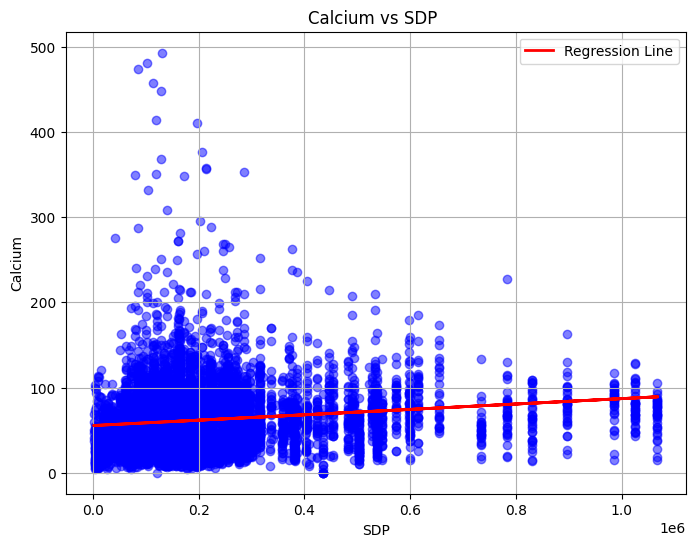

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, model.coef_[0] * X + model.intercept_, color='red', linewidth=2, label='Regression Line')
plt.title("Calcium vs SDP ")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.grid(True)
plt.legend()
plt.show()

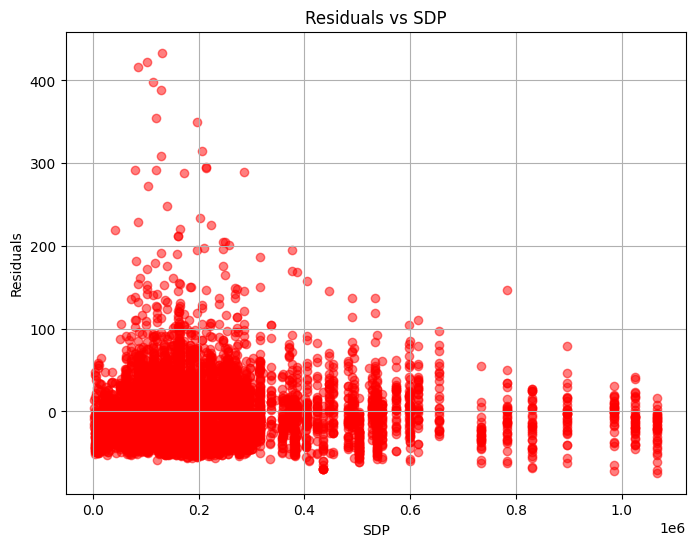

In [22]:
# Plot residuals vs calcium
residuals=y-y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, np.array(y-y_pred), color='red', alpha=0.5)
plt.title("Residuals vs SDP")
plt.xlabel("SDP")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

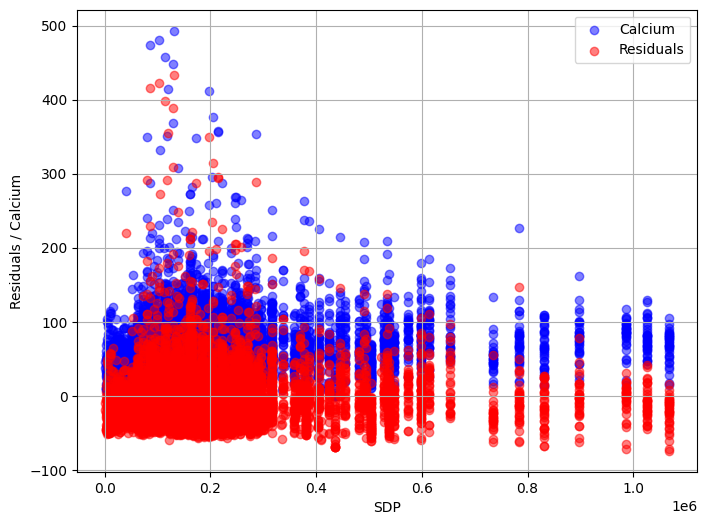

In [23]:
import matplotlib.pyplot as plt

# Plot residuals vs calcium
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Calcium')  # Add label for calcium
plt.scatter(X, residuals, color='red', alpha=0.5, label='Residuals')  # Add label for residuals

# Add title and labels
# plt.title("Groundwater Quality (Calcium) vs SDP Residuals")
plt.xlabel("SDP")
plt.ylabel("Residuals / Calcium")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


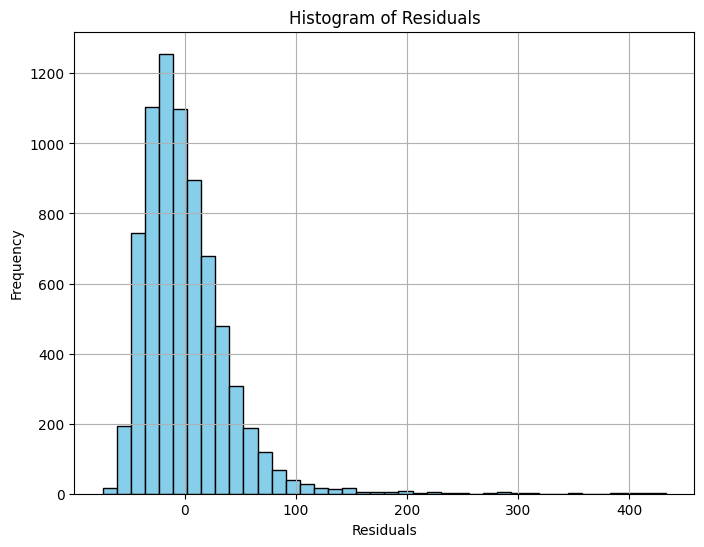

In [24]:
plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=40, color='#fa50ef', edgecolor='black')
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black')

plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In order to interpret the above regression plot and the OLS Regression table, we notice that coefficient of SDP is 4.71x10(^-5), in essence, if we change the value of independent variable i.e SDP by 1 unit then that would result in a change of 4.71x10(^-5) units on the dependent variable i.e ground-water quality indicator, in this case, calcium. Also, the error coefficient is 53.8226 units and goodness of fit(R-squared) = 0.028 for the above regression as evident by the regression table as well.

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Reading data from the csv
data = pd.read_csv(r"Excels\merged_table.csv")

# Convert numeric columns to appropriate data type
data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
data[gwq] = pd.to_numeric(data[gwq], errors='coerce')
data['Gini'] = pd.to_numeric(data['Gini'], errors='coerce')

# Drop rows with NaN values
data.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

# Defining the variables
x = data['SDP'].values.reshape(-1, 1)  # Independent variable
y = data[gwq].values  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = data['Gini'].values.reshape(-1, 1)  # Fourth variable

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree here
X_poly = poly.fit_transform(x)

# Add fourth variable
X_poly = np.concatenate((X_poly, x4), axis=1)

# Fit the model
model = LinearRegression(fit_intercept=True).fit(X_poly, y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = model.score(X_poly, y)
print("R^2:", r_squared)


Intercept: 38.077692952282774
Coefficients: [ 0.00000000e+00  2.33811881e-04 -4.87236665e-10  2.91541964e-16
  3.45292750e-11]
R^2: 0.05084670024189275


In [26]:
y_pred = model.predict(X_poly)

np.sum(y-y_pred)

2.9103830456733704e-11

In [27]:
residuals=(list(y-y_pred))
len(residuals)
# tanishk do from here , apply the methods on residuals

7187

In [28]:
y.shape

(7187,)

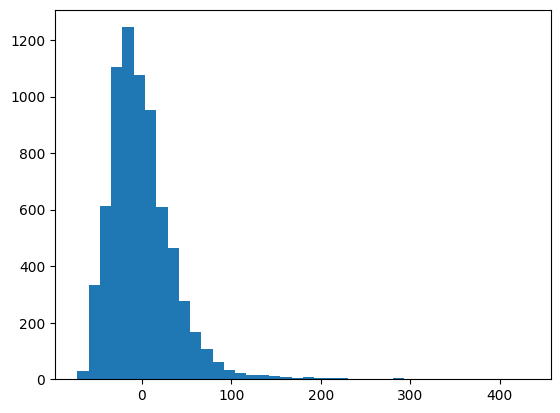

In [29]:
residual_mapped=list(zip(list(x.reshape(-1)), residuals,list(y.reshape(-1))))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset=residuals
plt.hist(dataset, bins =40)
#z score

def detect_outliers(data,residual_mapped):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in range(len(data)):
    z_score=(data[i]-mean)/std
    if(np.abs(z_score)>threshold):
      outliers.append(residual_mapped[i])
  return outliers
outlier_z_score=detect_outliers(dataset,residual_mapped)


In [30]:
outlier_z_score

[(89372.0, 164.70968752053184, 220.0),
 (99549.0, 127.18746995579804, 184.0),
 (134350.0, 150.59727355761893, 212.0),
 (185366.0, 145.46634369564083, 212.0),
 (202749.0, 228.1162585421854, 296.0),
 (210171.0, 191.5974035871775, 260.0),
 (222730.0, 218.79519649652116, 288.0),
 (257415.0, 194.04831386383734, 265.0),
 (271636.0, 140.51851874049962, 212.0),
 (121588.0, 125.17266977245615, 185.0),
 (121588.0, 141.00599977246026, 200.83333),
 (136780.0, 132.5610642827072, 194.25),
 (161159.0, 141.32280276455214, 205.64706),
 (40994.0, 229.1361433885109, 276.0),
 (119958.0, 354.38274319961715, 414.0),
 (782973.0, 164.86289632046373, 227.25),
 (285979.0, 281.4197867562255, 353.33334),
 (102977.0, 154.09347408606436, 211.39999),
 (160602.0, 117.73126211970859, 182.0),
 (112636.0, 140.47656660400457, 199.125),
 (152123.0, 158.60315739893758, 222.0),
 (160602.0, 207.7312621197079, 272.0),
 (205923.0, 118.89023462677993, 187.0),
 (246058.0, 197.54730553218127, 268.0),
 (268926.0, 134.6115362452349

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


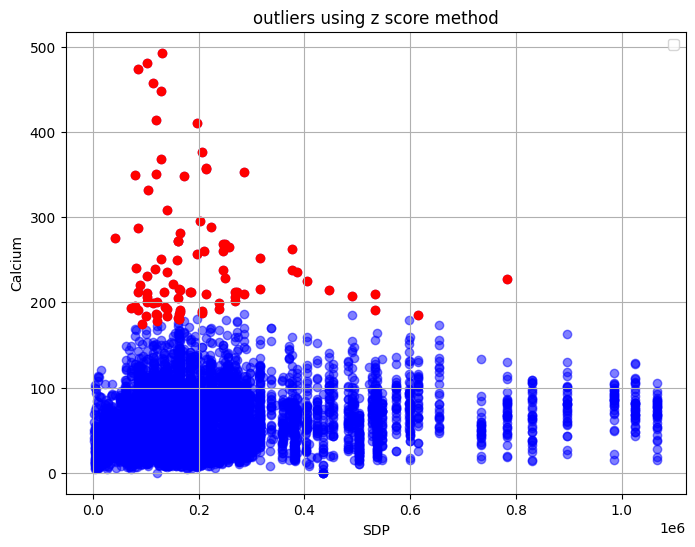

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
# Color the points red
for item in outlier_z_score:
    plt.scatter(item[0], item[2], color='red')
# plt.plot(X, model.coef_[0] * X + model.intercept_, color='red', linewidth=2, label='Regression Line')
plt.title("outliers using z score method")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.grid(True)
plt.legend()
plt.show()

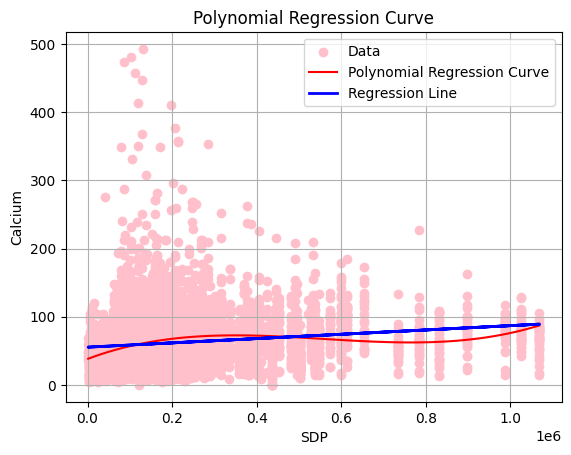

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of SDP values
sdp_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)

# Apply polynomial transformation
sdp_poly = poly.fit_transform(sdp_values)

# Add fourth variable
sdp_poly = np.concatenate((sdp_poly, np.repeat(x4.mean(), len(sdp_poly)).reshape(-1, 1)), axis=1)

# Calculate predicted values
y_pred = model.predict(sdp_poly)

# Plot the data points
plt.scatter(x, y, color='pink', label='Data')

# Plot the polynomial regression curve
plt.plot(sdp_values, y_pred, color='red', label='Polynomial Regression Curve')
plt.plot(X, 3.159791713381556e-05 * X + 55.367403782132804, color='blue', linewidth=2, label='Regression Line')

# Add labels and title
plt.title("Polynomial Regression Curve")
plt.xlabel("SDP")
plt.ylabel("Calcium")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
#this method is discarded as of now
dataset=sorted(dataset)
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)
iqr=q3-q1
print(iqr)
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)
def detect_outliers_iqr(data,lower_fence,upper_fence):
#   threshold=3
#   mean=np.mean(data)
#   std=np.std(data)
  outliers=[]
  for i in data:
    # z_score=(i-mean)/std
    if(i<=lower_fence or i>=upper_fence):
      outliers.append(i)
  return outliers
outlier_iqr=detect_outliers_iqr(dataset,lower_fence,upper_fence)



-24.712487514010967 16.646175973415545
41.35866348742651
-86.75048274515073 78.68417120455531


In [34]:
df = pd.read_csv(r"Excels\merged_table.csv")
df.columns
dummy_years = pd.get_dummies(df['year'], prefix='year')

# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_years], axis=1)

# Display the updated DataFrame
df.tail()
df.to_csv(r"Excels\year_dummy.csv")

In [35]:
dummy_years.head()

year_2000  year_2001  year_2002  year_2003  year_2004  year_2005  \
0       True      False      False      False      False      False   
1      False       True      False      False      False      False   
2      False      False       True      False      False      False   
3      False      False      False       True      False      False   
4      False      False      False      False       True      False   

   year_2006  year_2007  year_2008  year_2009  year_2010  year_2011  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   year_2012  year_2013  year_2014  year_2015  year_2016  year_2017  year_2018  
0      False      False      False      False      False      False      False  
1      False      False      False      False      False      False      False  
2      False      False      False      False      False      False      False  
3      False      False      False      False      False      False      False  
4      False      False      False      False      False      False      False

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Reading data from the csv
df = pd.read_csv(r"Excels\merged_table.csv")
df.columns
dummy_years = pd.get_dummies(df['year'], prefix='year')

# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_years], axis=1)

# Convert numeric columns to appropriate data type
df['SDP'] = pd.to_numeric(df['SDP'], errors='coerce')
df[gwq] = pd.to_numeric(df[gwq], errors='coerce')
df['Gini'] = pd.to_numeric(df['Gini'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

# Defining the variables
x = df['SDP'].values.reshape(-1, 1)  # Independent variable
y = df[gwq].values  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = data['Gini'].values.reshape(-1, 1)  # Fourth variable

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree here
X_poly = poly.fit_transform(x)

# Add fourth variable
X_poly = np.concatenate((X_poly, x4), axis=1)


# Fit the model
model = LinearRegression(fit_intercept=True).fit(X_poly, y)

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = model.score(X_poly, y)
print("R^2:", r_squared)


Intercept: 38.077692952282774
Coefficients: [ 0.00000000e+00  2.33811881e-04 -4.87236665e-10  2.91541964e-16
  3.45292750e-11]
R^2: 0.05084670024189275


In [37]:
# Reading data from the csv
df = pd.read_csv(r"Excels\merged_table.csv")
df.columns
dummy_years = pd.get_dummies(df['year'], prefix='year')

# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_years], axis=1)

# Convert numeric columns to appropriate data type
df['SDP'] = pd.to_numeric(df['SDP'], errors='coerce')
df[gwq] = pd.to_numeric(df[gwq], errors='coerce')
df['Gini'] = pd.to_numeric(df['Gini'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

In [38]:
df.head()

Unnamed: 0 country        state            district  year  \
0           0   India  West Bengal  24 Paraganas North  2000   
2           2   India  West Bengal  24 Paraganas North  2002   
4           4   India  West Bengal  24 Paraganas North  2004   
5           5   India  West Bengal  24 Paraganas North  2005   
7           7   India  West Bengal  24 Paraganas North  2007   

                     dyid  Serial No.           District    calcium       SDP  \
0  24 Paraganas North2000       625.0  North Twenty Four  50.588234  151670.0   
2  24 Paraganas North2002       625.0  North Twenty Four  85.666664  168324.0   
4  24 Paraganas North2004       625.0  North Twenty Four  57.040001  190029.0   
5  24 Paraganas North2005       625.0  North Twenty Four  32.108109  201994.0   
7  24 Paraganas North2007       625.0  North Twenty Four  42.833332  234798.0   

   ...  year_2009  year_2010  year_2011  year_2012  year_2013  year_2014  \
0  ...      False      False      False      False      False      False   
2  ...      False      False      False      False      False      False   
4  ...      False      False      False      False      False      False   
5  ...      False      False      False      False      False      False   
7  ...      False      False      False      False      False      False   

   year_2015  year_2016  year_2017  year_2018  
0      False      False      False      False  
2      False      False      False      False  
4      False      False      False      False  
5      False      False      False      False  
7      False      False      False      False  

[5 rows x 30 columns]

In [39]:
np.array(df['year_2007']).reshape(-1)[:10]

array([False, False, False, False,  True, False, False, False, False,
       False])

In [40]:
import numpy as np

final_x = X_poly.copy()
years = ['year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017']

for yr in years:
    curr_year = np.array(df[yr]).reshape(-1, 1)  # Reshape to make it a column vector
    new_x_poly = []
    
    # Multiply each element of X_poly by the current year and append to new_x_poly
    for i in range(len(X_poly)):
        l = []
        for j in range(len(X_poly[i])):
            l.append(X_poly[i][j] * curr_year[i])
        new_x_poly.append(l)
        
    # Convert new_x_poly to numpy array
    new_x_poly = np.array(new_x_poly).reshape(-1, len(X_poly[0]))  # Reshape to match final_x
    
    # Add new_x_poly to final_x by horizontally stacking them
    final_x = np.hstack((final_x, new_x_poly))
    
    print(final_x.shape)



(7187, 10)
(7187, 15)
(7187, 20)
(7187, 25)
(7187, 30)
(7187, 35)
(7187, 40)
(7187, 45)
(7187, 50)
(7187, 55)
(7187, 60)
(7187, 65)
(7187, 70)
(7187, 75)
(7187, 80)
(7187, 85)
(7187, 90)
(7187, 95)


In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
y = df[gwq].values  # Dependent variable

dummy_year_model = LinearRegression(fit_intercept=True).fit(final_x, y)

# Get coefficients and intercept
intercept = dummy_year_model.intercept_
coefficients = dummy_year_model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = dummy_year_model.score(final_x, y)
print("R^2:", r_squared)

Intercept: 20.2569417446771
Coefficients: [-1.24566708e-08  2.68192462e-04 -4.70576851e-10  2.45960888e-16
  3.91266543e-08 -7.82222660e-09  8.07520043e-04 -6.15941384e-09
  1.15342836e-14  1.39817822e-07  1.52751189e-07  6.24165941e-04
 -4.27064978e-09  6.66420564e-15  1.09810265e-07 -7.18997540e-09
  8.56888689e-04 -5.89584828e-09  9.67917857e-15  1.81256362e-07
  7.94467894e-08  2.43263559e-03 -2.16615540e-08  4.21130695e-14
  2.41557262e-08  1.19742099e-08  8.23771576e-04 -6.73819106e-09
  1.24024175e-14  3.33566320e-09  4.30393535e-10  5.52793376e-04
 -3.30948858e-09  4.77718451e-15  3.05527551e-10 -2.85362505e-09
  3.51130482e-04 -1.24737117e-09  1.07951300e-15 -4.50128529e-10
 -2.99817775e-09  4.01255554e-04 -1.93446576e-09  2.21827764e-15
 -5.41594230e-10 -1.29163432e-09  4.26381045e-04 -2.08336980e-09
  2.34567140e-15 -4.29071537e-11 -5.80215680e-09  2.06333346e-04
 -9.63405915e-10  1.06425285e-15 -1.39353782e-09 -5.36951244e-09
 -9.94127701e-06  1.16057085e-09 -3.25889489e-15

In [42]:
y_dummy_year_pred=dummy_year_model.predict(final_x)

np.sum(y-y_dummy_year_pred)

1.0732037480920553e-10

In [43]:
df.columns

Index(['Unnamed: 0', 'country', 'state', 'district', 'year', 'dyid',
       'Serial No.', 'District', 'calcium', 'SDP', 'Gini', 'year_2000',
       'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005',
       'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018'],
      dtype='object')

In [44]:
# Reading data from the csv
df = pd.read_csv(r"Excels\merged_table.csv")
df.columns
# dummy_years = pd.get_dummies(df['year'], prefix='year')

# Concatenate the original DataFrame with the dummy variable DataFrame
# df = pd.concat([df, dummy_years], axis=1)

# Convert numeric columns to appropriate data type
df['SDP'] = pd.to_numeric(df['SDP'], errors='coerce')
df[gwq] = pd.to_numeric(df[gwq], errors='coerce')
df['Gini'] = pd.to_numeric(df['Gini'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

In [45]:
def classify_region(state):
    if state in ['Chandigarh','Delhi','Haryana','Himachal Pradesh','Jammu And Kashmir','Punjab','Rajasthan']:
        return 'NORTHERN REGION'
    elif state in ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Tripura']:  #manipur,mizoram not in data
        return 'NORTH-EASTERN REGION'
    elif state in ['Andaman And Nicobar Islands','Bihar','Jharkhand','Odisha','West Bengal']:#sikkim not in data
        return 'EASTERN REGION'
    elif state in ['Chhattisgarh','Madhya Pradesh','Uttar Pradesh', 'Uttarakhand',  ]:
        return 'CENTRAL REGION'
    if state in ['Dadra & Nagar Haveli','Daman & Diu','Goa','Gujarat','Maharashtra']: # Dadra & Nagar,Daman & Diu Haveli not in data
        return 'WESTERN REGION'
    elif state in ['Andhra Pradesh','Karnataka','Kerala','Lakshadweep','Pondicherry','Tamilnadu','Telangana','Tamil Nadu']: # Lakshadweep not in data  . 'Telangana' added to southern region
        return 'SOUTHERN REGION'
    else:
        print("unknown found", state)
        return 'Unknown'

In [46]:
df['Region'] = df['state'].apply(classify_region)

In [47]:
dummy_regions = pd.get_dummies(df['Region'], prefix='region')

# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_regions], axis=1)

In [48]:
df.columns


Index(['Unnamed: 0', 'country', 'state', 'district', 'year', 'dyid',
       'Serial No.', 'District', 'calcium', 'SDP', 'Gini', 'Region',
       'region_CENTRAL REGION', 'region_EASTERN REGION',
       'region_NORTH-EASTERN REGION', 'region_NORTHERN REGION',
       'region_SOUTHERN REGION', 'region_WESTERN REGION'],
      dtype='object')

In [49]:
curr_rg = np.array(df['region_EASTERN REGION']).reshape(-1, 1)
curr_rg

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [50]:
import numpy as np

final_x_region = X_poly.copy()
region = ['region_NORTHERN REGION','region_NORTH-EASTERN REGION','region_EASTERN REGION','region_CENTRAL REGION','region_WESTERN REGION']  #southern region is the base cat

for rg in region:
    curr_rg = np.array(df[rg]).reshape(-1, 1)  # Reshape to make it a column vector
    # print(curr_rg)
    new_x_poly_rg= []
    
    # Multiply each element of X_poly by the current year and append to new_x_poly
    for i in range(len(X_poly)):
        l = []
        for j in range(len(X_poly[i])):
            l.append(X_poly[i][j] * curr_rg[i])
        # print(l)
        new_x_poly_rg.append(l)
        
    # Convert new_x_poly to numpy array
    new_x_poly_rg = np.array(new_x_poly_rg).reshape(-1, len(X_poly[0]))  # Reshape to match final_x
    
    # Add new_x_poly to final_x by horizontally stacking them
    final_x_region = np.hstack((final_x_region, new_x_poly_rg))
    # print(final_x_region)
    # break

    
    print(final_x_region.shape)



(7187, 10)
(7187, 15)
(7187, 20)
(7187, 25)
(7187, 30)


In [51]:
X_poly[0]

array([1.00000000e+00, 1.51670000e+05, 2.30037889e+10, 3.48898466e+15,
       3.80000000e-01])

In [52]:
final_x_region[0].shape

(30,)

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
y = df[gwq].values  # Dependent variable

dummy_region_model = LinearRegression(fit_intercept=True).fit(final_x_region, y)

# Get coefficients and intercept
intercept = dummy_region_model.intercept_
coefficients = dummy_region_model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = dummy_region_model.score(final_x_region, y)
print("R^2:", r_squared)

Intercept: 37.14979749860284
Coefficients: [-1.45924559e-07  4.77764984e-04 -1.82809542e-09  1.95725597e-15
 -6.12362684e-06  1.47347288e-06  7.45600679e-05 -1.27991113e-09
  3.93429186e-15 -2.76087078e-08 -2.71017880e-07 -2.01022891e-03
  3.63128704e-08 -2.03497369e-13 -6.27728272e-08  6.02026377e-07
 -2.54757809e-04  2.76299015e-10  6.89166335e-16 -6.70722307e-07
 -1.15793021e-07 -2.40044330e-05 -9.13363117e-11  1.09219816e-16
 -3.62283902e-08 -5.28389403e-08 -1.66977254e-04  1.22147119e-09
 -1.62494801e-15 -1.33418619e-08]
R^2: 0.15119843576848124


In [54]:
coefficients.shape

(30,)

In [55]:
unique_states = df['state'].unique()
print(sorted(unique_states))

['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Tamilnadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [56]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# import pandas as pd

# # Reading data from the csv
# data = pd.read_csv(r"Excels\merged_table.csv")

# # Convert numeric columns to appropriate data type
# data['SDP'] = pd.to_numeric(data['SDP'], errors='coerce')
# data[gwq] = pd.to_numeric(data[gwq], errors='coerce')
# data['Gini'] = pd.to_numeric(data['Gini'], errors='coerce')

# # Drop rows with NaN values
# data.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

# # Defining the variables
# x = data['SDP'].values.reshape(-1, 1)  # Independent variable
# y = data[gwq].values  # Dependent variable
# x2 = x ** 2
# x3 = x ** 3
# x4 = data['Gini'].values.reshape(-1, 1)  # Fourth variable

# # Create polynomial features
# poly = PolynomialFeatures(degree=3)  # You can change the degree here
# X_poly = poly.fit_transform(x)

# # Add fourth variable
# # X_poly = np.concatenate((X_poly, x4), axis=1)

# # Fit the model
# model = LinearRegression(fit_intercept=True).fit(X_poly, x4)

# # Get coefficients and intercept
# intercept = model.intercept_
# coefficients = model.coef_

# # Print coefficients
# print("Intercept:", intercept)
# print("Coefficients:", coefficients)

# # Evaluate R^2
# r_squared = model.score(X_poly, x4)
# print("R^2:", r_squared)
